In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

<h1>Introduction</h1>

    For our project, we have set out to analyze a data science salaries dataset, to see if we can use features in the dataset in order to predict the job title of an employee. There are 93 Unique job titles that are all related to data, but the two most common by a wide margin are "Data Scientist", and "Data Engineer"

    Because of this, we have encoded the job title target column as 1 for data scientists/ engineers, and 0 for any other data related career. Below is our work at processing our data and building a classifier that would help us to predict this target variable.

# Read the data

In [35]:
ds_salaries = pd.read_csv('data/ds_salaries.csv')
ds_salaries.dropna()
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [36]:
print(len(ds_salaries['job_title'].unique()))

93


In [28]:
ds_salaries['job_title'].value_counts()

def engineer_or_scientist(title):
    """returns true if job_title is "Data Engineer or "Data Scientist"""""
    if(title == 'Data Engineer' or title == 'Data Scientist'):
        return 0
    return 1
ds_salaries['job_title'] = ds_salaries['job_title'].apply(lambda x : engineer_or_scientist(x))

ds_salaries.head(10)
    

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,1,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,1,30000,USD,30000,US,100,US,S
2,2023,MI,CT,1,25500,USD,25500,US,100,US,S
3,2023,SE,FT,0,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,0,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,1,222200,USD,222200,US,0,US,L
6,2023,SE,FT,1,136000,USD,136000,US,0,US,L
7,2023,SE,FT,0,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,0,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,0,147100,USD,147100,US,0,US,M


In [34]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   int64 
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(5), object(6)
memory usage: 322.8+ KB


In [29]:
ds_salaries.shape

(3755, 11)

# Splitting the data into training and testing sets // encoding categorical variables

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

l_encode = LabelEncoder() # use to encode categorical variables 
scaler = StandardScaler() # use to normalize numerical variables 

df = ds_salaries.loc[:, ['job_title', 'remote_ratio','salary_in_usd','employee_residence','company_size']]

# Encode the categorical variables in the dataset
df['employee_residence'] = l_encode.fit_transform(df['employee_residence'].to_numpy())
df['company_size'] = l_encode.fit_transform(df['company_size'].to_numpy())

# Normalize the salary_in_usd
df['salary_in_usd'] = scaler.fit_transform(df['salary_in_usd'].to_numpy().reshape(-1, 1))

X = df.drop(labels=["job_title"], axis=1) # select the features
y = (df['job_title']).values # select the target    

# split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y,random_state=10) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((2816, 4), (2816,), (939, 4), (939,))

<h1>Features rationale:</h1>

    For our model, we decided to use four features to help determine the job title of an employee. For practical reasons, we thought that encoding categorical variables as features would be a unique challenge, and we believe the residence of the employee and company size would have an impact on what career they would have (proximity to DC may imply working for a contractor, for example, which could skew results to their data needs). 

    Remote_ratio was an interesting feature as well, as we found it would be interesting to see if it makes a major impact on patterns in jobs. (Do some jobs demand more on-site work? is this the case for Data Engineers/Scientists?)

    Another Numerical feature we chose was salary in USD. We saw no reason to use other salary features on the chance it may negatively impact our model when we already can control for currency differences with this feature.

# Training the model // scaling values

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred =  model.predict(X_test_scaled)

report = classification_report(y_test,y_pred, labels=np.unique(y_pred))
conf_matrix = confusion_matrix(y_test,y_pred, labels=np.unique(y_pred))
    

/Users/Omani/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
print(report)

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       448
           1       0.55      0.27      0.37       491

    accuracy                           0.50       939
   macro avg       0.52      0.51      0.48       939
weighted avg       0.52      0.50      0.47       939



<h1>Report Explanation</h1>


The Precision of Data scientists/engineers and other data job titles are .56 and .50 respectively, meaning: 

56% of predicted Data engineer/scientists are truly data engineers/scientists, and 50% of predicted alternate job titles in the field happen to truly fit that characterization. 

The Precision of Data scientists/engineers and other data job titles are .56 and .50 respectively, meaning: 

33% of actual Data scientists/engineers are predicted as positive, while 72% of alternate job titles in the field are predicted as positive

<h3>f1-score</h3>

    The f1 score for Data engineer/scientists and alternate titles at .42 and .59 respectively, meaning, similarly to the precision and recall scores, that the model is not very good at making classifications as currently constructed. This makes sense, since it is the harmonic mean of both recall and precision. So it would be higher for alternate job titles since those scores have a higher average. 

<h3>Takeaway</h3>
    This model, as it currently stands, has a good bit of room to grow before we would feel confident in making classifications about peoples jobs, as evidenced by the report metrics. 

    More data, and perhaps more useful features to build models on (perhaps more demographic information, Cost of living, raw text reviews of employees job satisfaction, etc) would lead to a more successful model, though the exact improvements are currently unknown.

<h1>Building The Confusion Matrix</h1>

Text(0.5, 0.98, 'Plot of confusion matrix')

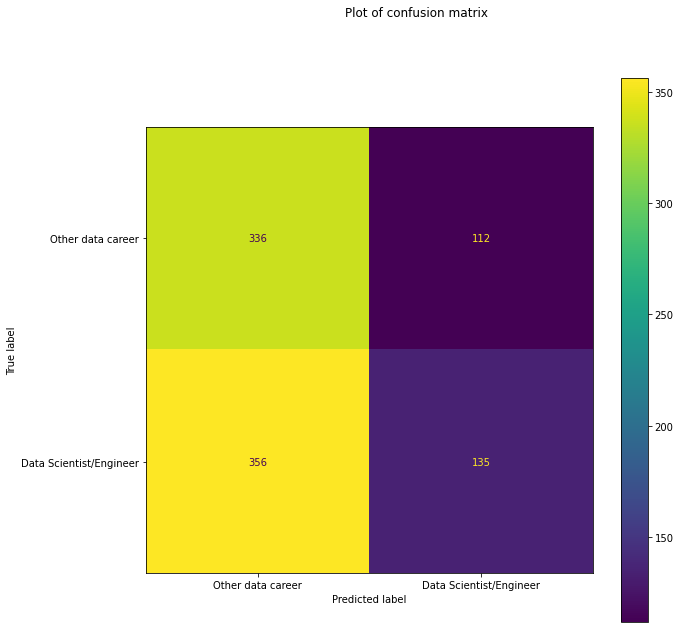

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
labels =  ['Other data career', 'Data Scientist/Engineer']
disp = ConfusionMatrixDisplay(conf_matrix,display_labels= labels ,)
disp.plot()

fig = disp.figure_
fig.colorbar
fig.set_figwidth(10)
fig.set_figheight(10) 
fig.suptitle('Plot of confusion matrix')


<h1>Confusion Matrix Explanation/Takeaways</h1>

    The confusion matrix below provides a visual representation of the report we derived from training our logistic regression model. The matrix provides us with a look into the exact numbers of classifications, broken down into true positives/negatives, and false positives/negatives. 

    For example, 327 of the (327 + 164) = 491 Data scientist/engineers in the test set were incorrectly predicted as 'other data career'. (False negative)

    164 of the 291 predicted data scientist/engineers were correctly classified (True positives, ratio indicative of precision.)

<h1>Demographic Grouping and analysis of it's implications</h1>